# MIA attacks on Length-of-Stay predictor, Gated Recurrent Unit with Decay (GRU-D)
## Installation of Packages in Conda

To install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys

from torch import zeros

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from utils.data_processing import get_mimic_dataloaders, get_mimic_dataset

In [3]:
# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

train_frac = 0.4
valid_frac = 0.0
test_frac = 0.0
early_stop_frac = 0.4
batch_size = 59
flatten = False # If LR, flatten the data

dataset, train_indices, validation_indices, test_indices, early_stop_indices= get_mimic_dataset(path,
                                                                            train_frac ,
                                                                            valid_frac,
                                                                            test_frac,
                                                                            early_stop_frac,
                                                                            flatten)

/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:195: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df_out.loc[:,idx[:,"mean"]] = df_out.loc[:,idx[:,"mean"]].groupby(ID_COLS).fillna(
/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:195: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_out.loc[:,idx[:,"mean"]] = df_out.loc[:,idx[:,"mean"]].groupby(ID_COLS).fillna(
/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:197: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  ).groupby(ID_

Saved dataset to /home/fazeleh/LeakPro/examples/mia/LOS/data/unflattened/dataset.pkl
Saved train and test indices to /home/fazeleh/LeakPro/examples/mia/LOS/data/unflattened/indices.pkl


In [4]:
train_loader, validation_loader, test_loader, early_stop_loader = get_mimic_dataloaders(dataset,
                                                            train_indices,
                                                            validation_indices,
                                                            test_indices,
                                                            early_stop_indices,
                                                            batch_size)

The best parameter is set based on 

In [13]:
best_hyperparams ={
    "cell_size": 58,
    "hidden_size": 78,
    "learning_rate": 0.0004738759319792616,
    "num_epochs":37,
    "patience_early_stopping": 20,
    "patience_lr_scheduler": 5,
    "batch_size": 59,
    "seed": 4410,
    "min_delta": 0.00001,
    }
n_features = int(dataset.x.shape[1]/3)
X_mean = zeros(1,dataset.x.shape[2],n_features)

model_params = {k: best_hyperparams[k] for k in ["cell_size", "hidden_size", "batch_size"]}

# Add other required parameters to model_params
model_params.update({
    "input_size": n_features,
    "X_mean": X_mean,
    "output_last": False
})

In [14]:
from utils.model_grud import *

# Initialize the model with filtered parameters
model = GRUD(**model_params)

# Train the model with Train_Model function
train_losses, test_losses , train_acc, test_acc = gru_trained_model_and_metadata(model,
                                                                                train_loader,
                                                                                early_stop_loader,
                                                                                epochs = best_hyperparams["num_epochs"],
                                                                                patience_early_stopping = best_hyperparams["patience_early_stopping"],
                                                                                patience_lr= best_hyperparams["patience_lr_scheduler"],
                                                                                min_delta = best_hyperparams["min_delta"],
                                                                                learning_rate = best_hyperparams["learning_rate"])

Model Structure:  GRUD(
  (zl): Linear(in_features=286, out_features=78, bias=True)
  (rl): Linear(in_features=286, out_features=78, bias=True)
  (hl): Linear(in_features=286, out_features=78, bias=True)
  (gamma_x_l): FilterLinear(in_features=104, out_features=104, bias=True)
  (gamma_h_l): Linear(in_features=104, out_features=78, bias=True)
  (fc): Linear(in_features=78, out_features=2, bias=True)
  (bn): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.7, inplace=False)
)
Start Training ... 
Output type dermined by the model


Training Progress:   0%|          | 0/37 [00:00<?, ?it/s]

Training Progress:   3%|▎         | 1/37 [00:06<03:55,  6.55s/it]

Epoch 0: Validation loss improved to 0.5521
Learning Rate: 0.000474
Epoch: 0, train_loss: 0.90636154, valid_loss: 0.55211937, time: 6.55


Training Progress:   5%|▌         | 2/37 [00:13<03:49,  6.56s/it]

Epoch 1: No improvement. Patience counter: 1/20
Learning Rate: 0.000474
Epoch: 1, train_loss: 0.80136162, valid_loss: 0.56365985, time: 6.57


Training Progress:   8%|▊         | 3/37 [00:19<03:44,  6.60s/it]

Epoch 2: Validation loss improved to 0.5366
Learning Rate: 0.000474
Epoch: 2, train_loss: 0.77195436, valid_loss: 0.53658527, time: 6.63


Training Progress:  11%|█         | 4/37 [00:26<03:38,  6.61s/it]

Epoch 3: No improvement. Patience counter: 1/20
Learning Rate: 0.000474
Epoch: 3, train_loss: 0.73790004, valid_loss: 0.55228055, time: 6.63


Training Progress:  14%|█▎        | 5/37 [00:33<03:32,  6.64s/it]

Epoch 4: No improvement. Patience counter: 2/20
Learning Rate: 0.000474
Epoch: 4, train_loss: 0.71873741, valid_loss: 0.55908412, time: 6.69


Training Progress:  16%|█▌        | 6/37 [00:39<03:26,  6.66s/it]

Epoch 5: No improvement. Patience counter: 3/20
Learning Rate: 0.000474
Epoch: 5, train_loss: 0.69222196, valid_loss: 0.55400985, time: 6.69


Training Progress:  19%|█▉        | 7/37 [00:46<03:20,  6.67s/it]

Epoch 6: No improvement. Patience counter: 4/20
Learning Rate: 0.000474
Epoch: 6, train_loss: 0.67985916, valid_loss: 0.5957284, time: 6.7


Training Progress:  22%|██▏       | 8/37 [00:52<03:08,  6.50s/it]

Epoch 7: No improvement. Patience counter: 5/20
Learning Rate: 0.000474
Epoch: 7, train_loss: 0.66387347, valid_loss: 0.56931973, time: 6.14


Training Progress:  24%|██▍       | 9/37 [00:58<02:58,  6.37s/it]

Epoch 8: No improvement. Patience counter: 6/20
Epoch 00009: reducing learning rate of group 0 to 2.3694e-04.
Learning Rate: 0.000237
Epoch: 8, train_loss: 0.64136235, valid_loss: 0.55766076, time: 6.07


Training Progress:  27%|██▋       | 10/37 [01:04<02:49,  6.26s/it]

Epoch 9: No improvement. Patience counter: 7/20
Learning Rate: 0.000237
Epoch: 9, train_loss: 0.62207052, valid_loss: 0.57464665, time: 6.04


Training Progress:  30%|██▉       | 11/37 [01:11<02:45,  6.35s/it]

Epoch 10: No improvement. Patience counter: 8/20
Learning Rate: 0.000237
Epoch: 10, train_loss: 0.60348744, valid_loss: 0.57632536, time: 6.56


Training Progress:  32%|███▏      | 12/37 [01:17<02:40,  6.43s/it]

Epoch 11: No improvement. Patience counter: 9/20
Learning Rate: 0.000237
Epoch: 11, train_loss: 0.59231318, valid_loss: 0.57279688, time: 6.6


Training Progress:  35%|███▌      | 13/37 [01:24<02:36,  6.50s/it]

Epoch 12: No improvement. Patience counter: 10/20
Learning Rate: 0.000237
Epoch: 12, train_loss: 0.57390324, valid_loss: 0.57594812, time: 6.67


Training Progress:  38%|███▊      | 14/37 [01:31<02:30,  6.55s/it]

Epoch 13: No improvement. Patience counter: 11/20
Learning Rate: 0.000237
Epoch: 13, train_loss: 0.56770237, valid_loss: 0.57286054, time: 6.66


Training Progress:  41%|████      | 15/37 [01:37<02:24,  6.59s/it]

Epoch 14: No improvement. Patience counter: 12/20
Epoch 00015: reducing learning rate of group 0 to 1.1847e-04.
Learning Rate: 0.000118
Epoch: 14, train_loss: 0.56387434, valid_loss: 0.58499092, time: 6.68


Training Progress:  43%|████▎     | 16/37 [01:44<02:18,  6.61s/it]

Epoch 15: No improvement. Patience counter: 13/20
Learning Rate: 0.000118
Epoch: 15, train_loss: 0.54714812, valid_loss: 0.60040212, time: 6.66


Training Progress:  46%|████▌     | 17/37 [01:51<02:12,  6.63s/it]

Epoch 16: No improvement. Patience counter: 14/20
Learning Rate: 0.000118
Epoch: 16, train_loss: 0.53270563, valid_loss: 0.59080571, time: 6.67


Training Progress:  49%|████▊     | 18/37 [01:57<02:06,  6.64s/it]

Epoch 17: No improvement. Patience counter: 15/20
Learning Rate: 0.000118
Epoch: 17, train_loss: 0.5288893, valid_loss: 0.58645028, time: 6.65


Training Progress:  51%|█████▏    | 19/37 [02:04<01:59,  6.64s/it]

Epoch 18: No improvement. Patience counter: 16/20
Learning Rate: 0.000118
Epoch: 18, train_loss: 0.52406142, valid_loss: 0.57634282, time: 6.66


Training Progress:  54%|█████▍    | 20/37 [02:11<01:53,  6.65s/it]

Epoch 19: No improvement. Patience counter: 17/20
Learning Rate: 0.000118
Epoch: 19, train_loss: 0.52052495, valid_loss: 0.56443512, time: 6.67


Training Progress:  57%|█████▋    | 21/37 [02:17<01:46,  6.65s/it]

Epoch 20: No improvement. Patience counter: 18/20
Epoch 00021: reducing learning rate of group 0 to 5.9234e-05.
Learning Rate: 0.000059
Epoch: 20, train_loss: 0.51442382, valid_loss: 0.57661468, time: 6.64


Training Progress:  59%|█████▉    | 22/37 [02:24<01:39,  6.65s/it]

Epoch 21: No improvement. Patience counter: 19/20
Learning Rate: 0.000059
Epoch: 21, train_loss: 0.50608683, valid_loss: 0.56753331, time: 6.66


Training Progress:  59%|█████▉    | 22/37 [02:31<01:43,  6.87s/it]

Epoch 22: No improvement. Patience counter: 20/20
Early stopping at epoch 22. Best validation loss: 0.5366


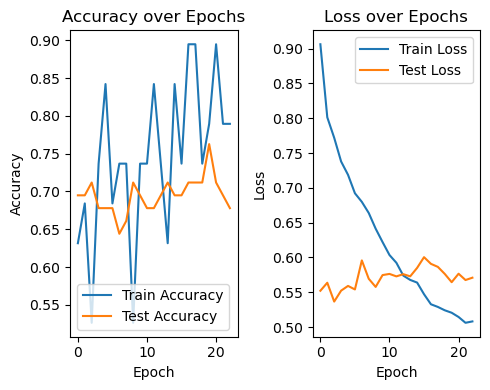

In [15]:
import matplotlib.pyplot as plt

# Convert losses to numpy-compatible lists directly
train_losses_cpu = [float(loss) for loss in train_losses]
test_losses_cpu = [float(loss) for loss in test_losses]

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

##  Attacking the GRUD model
Modify ```audit.yaml ``` file to attack GRUD model: 
  
  ```
  module_path: "utils/model_grud.py" 
  model_class: "GRUD"
  target_folder: "./target_GRUD"
  data_path: "./data/unflattened/dataset.pkl"
  ```

In [10]:
from mimic_gru_handler import MimicInputHandlerGRU

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandlerGRU, config_path)

# Run the audit
mia_results = leakpro.run_audit(return_results=True)

2024-12-18 22:30:53,355 INFO     Target model blueprint created from GRUD in utils/model_grud.py.
2024-12-18 22:30:53,416 INFO     Loaded target model metadata from ./target_GRUD/model_metadata.pkl
2024-12-18 22:30:53,423 INFO     Loaded target model from ./target_GRUD


2024-12-18 22:30:55,259 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2024-12-18 22:30:55,261 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2024-12-18 22:30:55,262 INFO     Configuring RMIA attack
2024-12-18 22:30:55,263 INFO     Added attack: rmia
2024-12-18 22:30:55,264 INFO     Added attack: lira
2024-12-18 22:30:55,265 INFO     Preparing attack: rmia
2024-12-18 22:30:55,265 INFO     Preparing shadow models for RMIA attack
2024-12-18 22:30:55,266 INFO     Preparing attack data for training the RMIA attack
2024-12-18 22:30:55,268 INFO     Check for 2 shadow models (dataset: 23944 points)
2024-12-18 22:30:55,319 INFO     Training shadow model 0 on 11977 points
Training Progress: 100%|██████████| 37/37 [05:08<00:00,  8.35s/it]
2024-12-18 22:36:04,137 INFO     Training shadow model 0 complete
2024-12-18 22:36:04,143 INFO     Saved shadow model 0 to ./leakpro_output/attack_objects/shadow_model
2024-12-18 22:36:04,144 INFO     Storing meta

## Report Genrating

In [11]:

# Import and initialize ReportHandler
from leakpro.reporting.report_handler import ReportHandler

# report_handler = ReportHandler()
report_handler = ReportHandler(report_dir="./leakpro_output/results")

# Save MIA resuls using report handler
for res in mia_results:
    report_handler.save_results(attack_name=res.attack_name, result_data=res, config=res.configs)

2024-12-18 22:42:15,086 INFO     Initializing report handler...
2024-12-18 22:42:15,087 INFO     report_dir set to: ./leakpro_output/results
2024-12-18 22:42:15,088 INFO     Saving results for rmia
2024-12-18 22:42:20,552 INFO     Saving results for lira


<Figure size 640x480 with 0 Axes>

In [12]:

# # Create the report by compiling the latex text
report_handler.create_report()

2024-12-18 22:42:39,092 INFO     No results of type GIAResults found.
2024-12-18 22:42:39,093 INFO     No results of type SinglingOutResults found.
2024-12-18 22:42:39,094 INFO     No results of type InferenceResults found.
2024-12-18 22:42:39,094 INFO     No results of type LinkabilityResults found.
2024-12-18 22:42:46,070 INFO     PDF compiled


<Figure size 640x480 with 0 Axes>